### Student Information
Name:洪裕竣

Student ID:s11214618

GitHub ID:s1Aylmer

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [16]:
### Begin Assignment Here

In [30]:
from datasets import load_dataset

# 載入資料集
ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

# 查看資料集的結構
print(ds)


DatasetDict({
    train: Dataset({
        features: ['sentiment', 'comment'],
        num_rows: 1500
    })
})


In [31]:
# 查看訓練資料集的前 2 筆資料
print(ds['train'][:2])



{'sentiment': ['not nostalgia', 'nostalgia'], 'comment': ['He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.', 'The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel']}


In [32]:
def clean_text(text):
    import re
    # 去除非字母字符，將所有字符轉換為小寫
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    return text

# 清理訓練資料中的 'comment' 欄位
ds = ds.map(lambda x: {'clean_comment': clean_text(x['comment'])})


Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

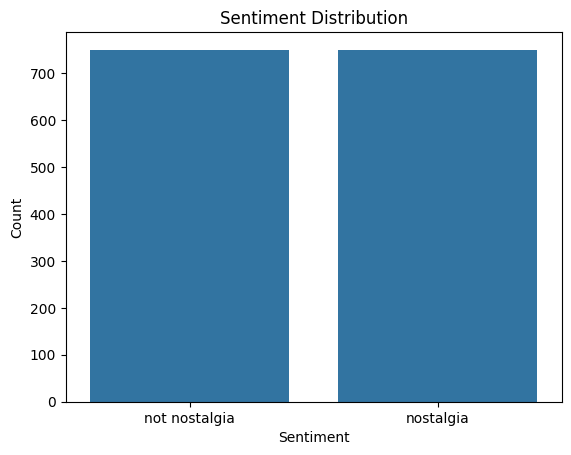

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 提取訓練數據中的情感標籤
sentiments = ds['train']['sentiment']

# 畫出情感標籤的分佈圖
sns.countplot(x=sentiments)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 將評論轉換為清理過的文本列表
comments = ds['train']['comment']

# 初始化 TfidfVectorizer 並生成特徵矩陣
vectorizer = TfidfVectorizer(max_features=500)  # max_features 可以控制保留的詞彙數量
X = vectorizer.fit_transform(comments)

# 檢查生成的 TF-IDF 特徵矩陣的形狀
print(X.shape)


(1500, 500)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 將資料集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, ds['train']['sentiment'], test_size=0.2, random_state=42)

# 訓練 Naive Bayes 模型
model = MultinomialNB()
model.fit(X_train, y_train)

# 使用測試集進行預測並計算準確率
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


Accuracy: 0.88


In [38]:
# 匯入需要的庫
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
